In [1]:
from qiskit import *
from qiskit import transpile
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_bloch_multivector, plot_histogram
import math

In [2]:
from qiskit import QuantumCircuit
qasm = """
OPENQASM 2.0;
include "qelib1.inc";

// triple control not gate : control qubits a,b,c and target d using ancila f
gate cccx a, b, c, d, f 
{
  ccx a, b, f;
  ccx f, c, d;
  ccx a, b, f;
}


// control control Z gate control qubits a,b and target c using ancila d
gate ccz a, b, c, d 
{
  ccx a, b, d;
  cz d, c;
  ccx a, b, d;
}

// Oracle f=x1x2x3'x4. takes x1,x2,x3,x4 as input of function and gives y=f(x) using two ancila anc1 and anc2
gate oracle  x1,x2,x3,x4,y,anc1,anc2
{
ccx x1, x2, anc1;
x x3;
ccx x3, x4, anc2;
ccx anc1, anc2, y;
ccx x3, x4, anc2;
x x3;
ccx x1, x2, anc1;
}

// triple control Z gate : control qubits a,b,c and target d using ancila f
gate cccz a, b, c, d, f 
{
h d;
cccx a, b, c, d, f;
h d;
}


qreg q[7];
creg c[7];

h q[0];
h q[1];
h q[2];
h q[3];
x q[4];
h q[4];

barrier q[0], q[1], q[2], q[3],q[4];

oracle q[0], q[1], q[2], q[3], q[4],q[5],q[6];

barrier q[0], q[1], q[2], q[3],q[4];

h q[0];
h q[1];
h q[2];
h q[3];
x q[0];
x q[1];
x q[2];
x q[3];
cccz q[0], q[1], q[2], q[3],q[5];
x q[0];
x q[1];
x q[2];
x q[3];

h q[0];
h q[1];
h q[2];
h q[3];
barrier q[0], q[1], q[2], q[3],q[4];

oracle q[0], q[1], q[2], q[3], q[4],q[5],q[6];
barrier q[0], q[1], q[2], q[3],q[4];
h q[0];
h q[1];
h q[2];
h q[3];
x q[0];
x q[1];
x q[2];
x q[3];
cccz q[0], q[1], q[2], q[3],q[5];
x q[0];
x q[1];
x q[2];
x q[3];
h q[0];
h q[1];
h q[2];
h q[3];
h q[4];
measure q[0] -> c[0];
measure q[1] -> c[1];
measure q[2] -> c[2];
measure q[3] -> c[3];
// @columns [0,0,0,0,1,2,3,4,5,6,7,7,7,8,8,8,9,10,10,10,11,12,12,12,13,14,15,16,17,17,17,18,18,18,19,20,20,20,21,21,21,21,22,23,24]
"""
circuit = QuantumCircuit.from_qasm_str(qasm)

     ┌───┐      ░ ┌─────────┐ ░ ┌───┐┌───┐┌───────┐┌───┐┌───┐ ░ ┌─────────┐ ░ »
q_0: ┤ H ├──────░─┤0        ├─░─┤ H ├┤ X ├┤0      ├┤ X ├┤ H ├─░─┤0        ├─░─»
     ├───┤      ░ │         │ ░ ├───┤├───┤│       │├───┤├───┤ ░ │         │ ░ »
q_1: ┤ H ├──────░─┤1        ├─░─┤ H ├┤ X ├┤1      ├┤ X ├┤ H ├─░─┤1        ├─░─»
     ├───┤      ░ │         │ ░ ├───┤├───┤│       │├───┤├───┤ ░ │         │ ░ »
q_2: ┤ H ├──────░─┤2        ├─░─┤ H ├┤ X ├┤2      ├┤ X ├┤ H ├─░─┤2        ├─░─»
     ├───┤      ░ │         │ ░ ├───┤├───┤│  Cccz │├───┤├───┤ ░ │         │ ░ »
q_3: ┤ H ├──────░─┤3 Oracle ├─░─┤ H ├┤ X ├┤3      ├┤ X ├┤ H ├─░─┤3 Oracle ├─░─»
     ├───┤┌───┐ ░ │         │ ░ └───┘└───┘│       │└───┘└───┘ ░ │         │ ░ »
q_4: ┤ X ├┤ H ├─░─┤4        ├─░───────────┤       ├───────────░─┤4        ├─░─»
     └───┘└───┘ ░ │         │ ░           │       │           ░ │         │ ░ »
q_5: ─────────────┤5        ├─────────────┤4      ├─────────────┤5        ├───»
                  │         │           

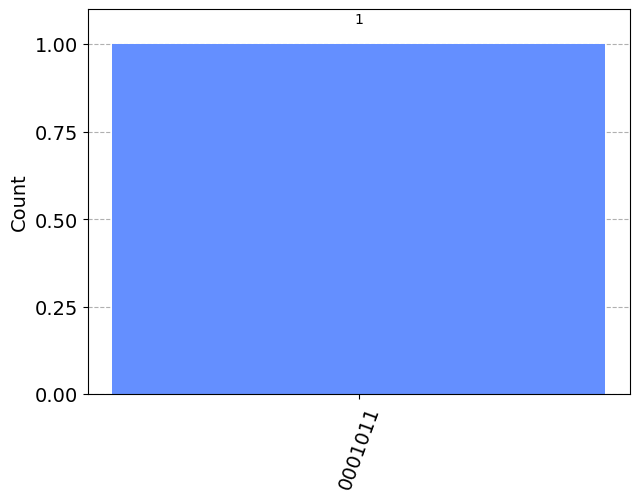

In [3]:
    print(circuit)
    
    #chosing backend and executing job
    backend = AerSimulator()
    
    # First we have to transpile the quantum circuit 
    # to the low-level QASM instructions used by the 
    # backend
    qc_compiled = transpile(circuit, backend)
    
    # Execute the circuit on the qasm simulator.
    # We've set the number of repeats of the circuit
    # to be 1024, which is the default.
    job_sim = backend.run(qc_compiled, shots=1)
    
    # Grab the results from the job.
    result_sim = job_sim.result()
    
    counts = result_sim.get_counts(qc_compiled)
    print(counts)
    plot_histogram(counts)
    